# 0 Import

In [1]:
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import scikitplot as skplt

import funcoes_suporte as fs
import feature_engenniring as fe
import data_preparation as dp

In [2]:
from sklearn.dummy import DummyClassifier
from sklearn import neighbors as nh
from sklearn import tree as tr
from sklearn.metrics import log_loss, brier_score_loss

## 0.1 Help Functions

In [3]:
fs.jupyter_settings(altura= 18, largura= 14, fonte= 11)
fs.supressao_notacao()

## 0.2 Load interim data

In [46]:
x_treino = pickle.load( open( "../data/processed/x_treino.pkl", "rb" ) )
y_treino = pickle.load( open( "../data/processed/y_treino.pkl", 'rb' ) )

x_teste = pickle.load( open( "../data/processed/x_teste.pkl", "rb" ) )
y_teste = pickle.load( open( "../data/processed/y_teste.pkl", 'rb' ) )

x_validacao = pickle.load( open( "../data/processed/x_validacao.pkl", "rb" ) )
y_validacao = pickle.load( open( "../data/processed/y_validacao.pkl", 'rb' ) )

## 0.3 Aplicando Data FE

In [47]:
x_teste['resposta'] = y_teste
x_teste = fe.fe(x_teste)

In [48]:
x_validacao['resposta'] = y_validacao
x_validacao = fe.fe(x_validacao)

## 0.4 Aplicando Data Preparation

In [49]:
x_teste = dp.data_prep(x_teste)

In [50]:
x_validacao = dp.data_prep(x_validacao)

## 0.5 Aplicando Feature Selection

In [51]:
cols_select = pickle.load(open( "../data/processed/cols_selected.pkl", "rb" ) )
cols_select.append('resposta')

In [52]:
x_teste = x_teste[cols_select]
x_validacao = x_validacao[cols_select]

del cols_select

## 0.6 Separando os dados novamente

In [53]:
x_teste = x_teste.dropna()
y_teste = x_teste['resposta']
x_teste = x_teste.drop(columns = ['resposta'])

In [54]:
x_validacao = x_validacao.dropna()
y_validacao = x_validacao['resposta']
x_validacao = x_validacao.drop(columns = ['resposta'])

# 1.0 Construção Modelos

# 1.1 Base Line

In [25]:
dummy = DummyClassifier()

## 1.2 KNN

In [26]:
knn_model = nh.KNeighborsClassifier( n_neighbors= 100)

## 1.3 Tree

In [27]:
rf_model = tr.DecisionTreeClassifier(max_depth=20)

# 2.0 Treinamento Modelos Treino x Teste

## 2.1 Base Line

In [60]:
dummy.fit(x_treino,y_treino)

y_proba = dummy.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba))
print("Brier Score:", brier_score_loss(y_teste, y_proba[:, 1]))

Log Loss: 0.3716802782102537
Brier Score: 0.10741838594716308


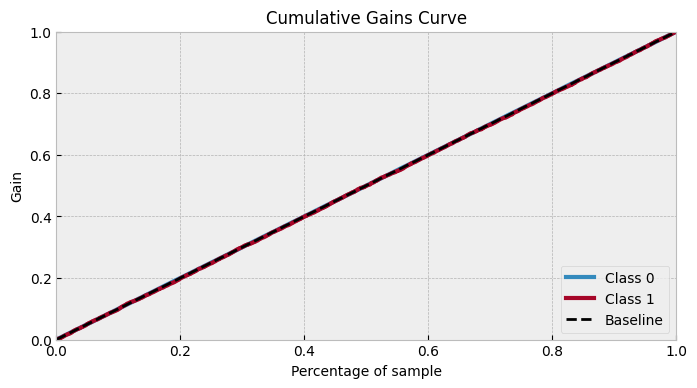

In [61]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba)
    plt.show()

## 2.2 KNN

In [62]:
knn_model.fit( x_treino, y_treino )

y_proba_knn = knn_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_knn))
print("Brier Score:", brier_score_loss(y_teste, y_proba_knn[:, 1]))

Log Loss: 0.28026389098123305
Brier Score: 0.08824563106796116


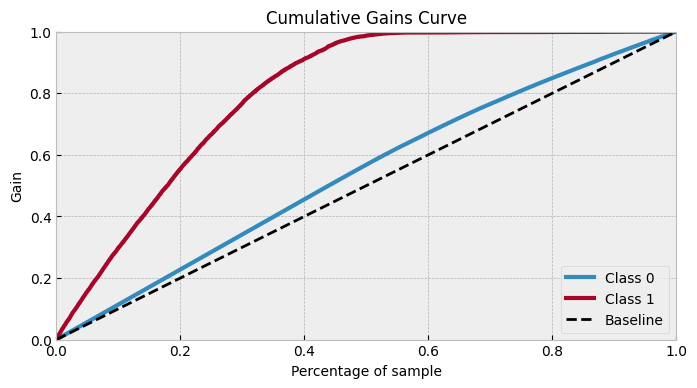

In [63]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_knn)
    plt.show()

## 2.3 Tree

In [64]:
rf_model.fit(x_treino, y_treino)

y_proba_rf = rf_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_rf))
print("Brier Score:", brier_score_loss(y_teste, y_proba_rf[:, 1]))

Log Loss: 1.8722174387383999
Brier Score: 0.11320010163787392


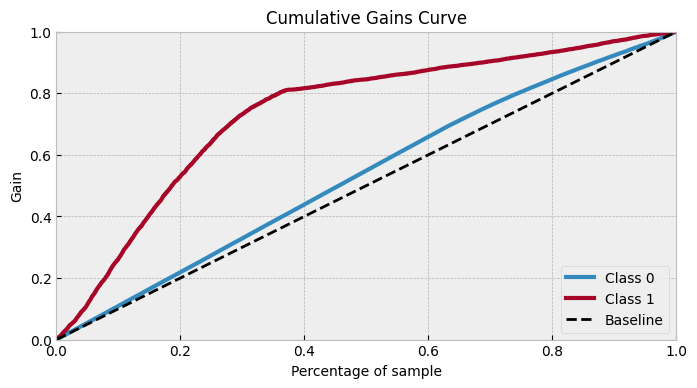

In [65]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_rf)
    plt.show()

# 3.0 (Treino + Teste) x Validação

## 3.1 Base Line

In [66]:
x_treino_teste = pd.concat([x_treino,x_teste])
y_treino_teste = pd.concat([y_treino,y_teste])

In [67]:
dummy.fit(x_treino_teste,y_treino_teste)

y_proba_2 = dummy.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_2[:, 1]))

Log Loss: 0.3766525611056554
Brier Score: 0.1093236398642464


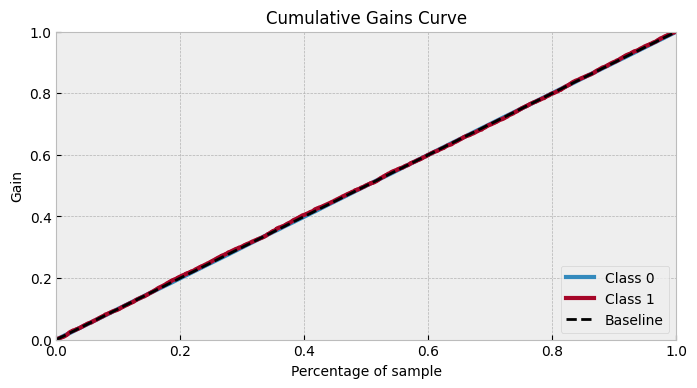

In [68]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_2)
    plt.show()

## 3.2 KNN

In [69]:
knn_model.fit( x_treino_teste, y_treino_teste )

y_proba_knn_2 = knn_model.predict_proba(x_validacao)

print("Log Loss:", log_loss(y_validacao, y_proba_knn_2))
print("Brier Score:", brier_score_loss(y_validacao, y_proba_knn_2[:, 1]))

Log Loss: 0.28124639057068274
Brier Score: 0.08940623469316351


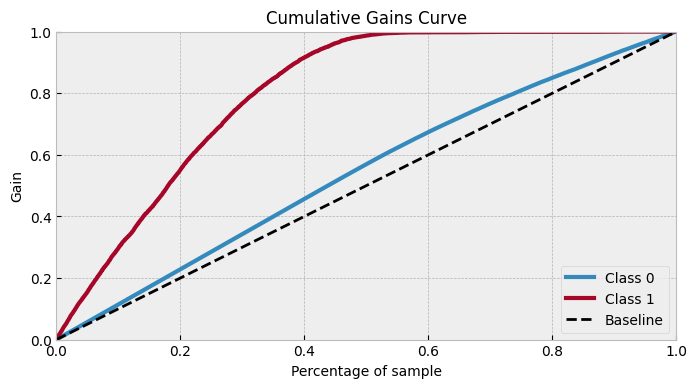

In [70]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_validacao, y_proba_knn_2)
    plt.show()

## 3.3 Tree

In [71]:
rf_model.fit(x_treino, y_treino)

y_proba_rf_2 = rf_model.predict_proba(x_teste)

print("Log Loss:", log_loss(y_teste, y_proba_rf_2))
print("Brier Score:", brier_score_loss(y_teste, y_proba_rf_2[:, 1]))

Log Loss: 1.87601292903081
Brier Score: 0.11333970289293374


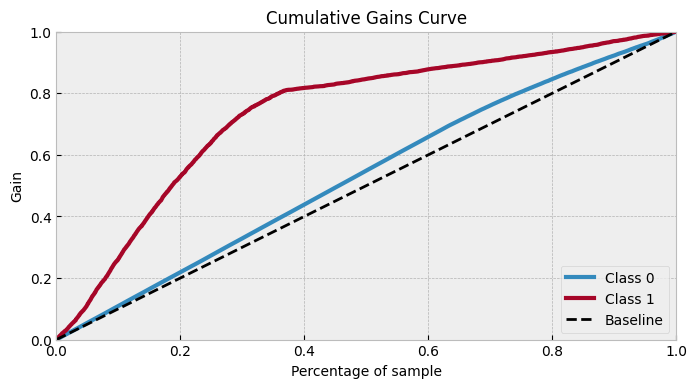

In [72]:
with plt.rc_context({'figure.figsize': (8, 4), 'font.size': 10}):
    skplt.metrics.plot_cumulative_gain(y_teste, y_proba_rf_2)
    plt.show()

# 4.0 Modelo Final